# Инфраструктура Python. Богатый вывод

todo Для удобства использования IPython стоит установить расширения

```
pip install jupyter_contrib_nbextensions
pip install jupyter_nbextensions_configurator
```

todo Темы IPython, полезные расширения, настройка реестра для запуска IPython, тоталоплагин?

tikz/asymptote, geogebra?

todo как заставить IPython не тормозить при объемном выводе и зацикливании?

## Богатый вывод в IPython

Упоминаются библиотеки `colorama`, `IPython`, `ipy_table`, `tabulate`, `qgrid`, `tqdm`

Библиотека `hexdump` позволяет удобно отображать бинарные строки, как в hex-редакторах и проводить обратные преобразования, например, над копипастой.

In [16]:
import hexdump, random
random.seed(0)
hexdump.hexdump(''.join([chr(random.randint(0, 255)) for i in range(50)]))

00000000: D8 C2 6B 42 82 67 C8 4D  7A 95 E8 81 48 C1 9E 40  ..kB.g.Mz...H..@
00000010: E8 FB CF E6 4F BA E6 AF  78 19 6F 9C E9 F7 7A DD  ....O...x.o...z.
00000020: 42 CE 8C 03 B8 66 D3 AB  00 7E DE 3E 53 DE 30 91  B....f...~.>S.0.
00000030: 3D F7                                             =.


In [17]:
hexdump.restore('''
00000000: D8 C2 6B 42 82 67 C8 4D  7A 95 E8 81 48 C1 9E 40  ..kB.g.Mz...H..@
00000010: E8 FB CF E6 4F BA E6 AF  78 19 6F 9C E9 F7 7A DD  ....O...x.o...z.
00000020: 42 CE 8C 03 B8 66 D3 AB  00 7E DE 3E 53 DE 30 91  B....f...~.>S.0.
00000030: 3D F7                                             =.
''')

'\xd8\xc2kB\x82g\xc8Mz\x95\xe8\x81H\xc1\x9e@\xe8\xfb\xcf\xe6O\xba\xe6\xafx\x19o\x9c\xe9\xf7z\xddB\xce\x8c\x03\xb8f\xd3\xab\x00~\xde>S\xde0\x91=\xf7'

Linux поддерживает раскраску символов в консоли выводом специальных escape-последовательностей вида `\033[31m` (синтаксис: `\033` `[` список кодов через `;` `m`) 3x — цвет текста, 4x — фона, 0 — сброс). Библиотека `colorama` упрощает генерацию этих escape-последовательностей и реализует схожее поведение на Windows. IPython с грехом пополам копирует цвет символов в свои выходные ячейки.

In [98]:
print("\033[43;35m magenta on yellow \033[0m")

 magenta on yellow 


In [1]:
from colorama import Fore, Back, Style
print Fore.RED + 'red text' + Fore.BLACK + Style.RESET_ALL + Style.RESET_ALL
print Back.YELLOW + 'yellow background' + Style.RESET_ALL + Back.RESET
print Back.MAGENTA + Fore.WHITE + 'white on green' + Style.RESET_ALL + Back.RESET
print Fore.BLACK + 'back to normal now'

red text
yellow background
white on green
back to normal now


In [ ]:
from colorama import Back, init
init()

In [18]:
print Fore.YELLOW + Style.BRIGHT + Back.MAGENTA + 'Alert!!!'

Alert!!!


todo Понять, что за ерунда, проверить в линухе, "реализует схожее поведение на Windows" - ??? powershell? cmder?

Сам IPython способен отображать довольно много видов объектов: размеченный markdown текст, HTML, формулы, картинки, SVG, таблицы

In [3]:
import IPython
import pandas
from time import sleep
import sys

In [28]:
IPython.display.Markdown('~~hello~~ $x^2$ *world* of `markdown`')

~~hello~~ $x^2$ *world* of `markdown`

todo Почему при рестарте пропадает маркдаун, SVG, стили у HTML-вывода show_diff, кастомные визуализаторы `<__main__.MyCircle instance at 0x00000000198FB3C8>`?

Содержимое объектов вроде `IPython.display.Markdown` просматривается в выходных ячейках как результат исполнения последней строки. Если нужно вывести IPython-объект не в последней строке, можно явно позвать функцию `IPython.display.display`

todo Примеры разнообразнее

In [25]:
IPython.display.display(IPython.display.Markdown('~~hello~~ $\sqrt{x^2}$ *world* **of** `markdown`'))
print 'usual text'

~~hello~~ $\sqrt{x^2}$ *world* **of** `markdown`

usual text


In [26]:
IPython.display.HTML('<b>hello</b> $\sqrt{x^2}$ <a href="http://en.wikipedia.org/">world</a> of <strike>HTML</strike>')

In [29]:
%%html
<b>hello</b> $\sqrt{x^2}$ <a href="http://en.wikipedia.org/">world</a> of <strike>HTML</strike>

In [429]:
IPython.display.Latex(r'$x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$')

<IPython.core.display.Latex object>

In [31]:
%%latex
$x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

<IPython.core.display.Latex object>

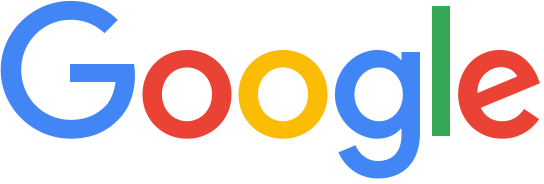

In [432]:
IPython.display.Image('https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png')

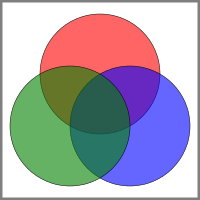

In [22]:
IPython.display.SVG('''<svg height="200px" width="200px">
  <rect x="0" y="0" width="200" height="200" fill="none" stroke="black" stroke-width="5px" stroke-opacity="0.5" />
  <g fill-opacity="0.6" stroke="black" stroke-width="0.5px">
    <circle cx="100px" cy="100px" r="60px" fill="red"   transform="translate(  0,-26)" />
    <circle cx="100px" cy="100px" r="60px" fill="blue"  transform="translate( 30, 26)" />
    <circle cx="100px" cy="100px" r="60px" fill="green" transform="translate(-30, 26)" />
  </g>
</svg>''')

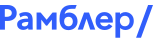

In [21]:
%%svg
<svg xmlns="http://www.w3.org/2000/svg" width="155" height="40" viewBox="0 0 155 40"><path fill="#315EFB" fill-rule="evenodd" d="M136.073 37.762h4.914L153 5h-4.914l-12.013 32.762zm-6.445-16.708c0 2.839-1.638 5.242-4.805 5.242-3.166 0-4.913-2.621-4.913-5.242s1.747-5.242 4.913-5.242c3.058 0 4.805 2.293 4.805 5.242m-4.259-8.955c-3.057 0-4.804 1.638-5.35 2.293v-1.857h-4.586v25.227h4.695v-9.828c.546.546 2.402 2.075 5.241 2.075 4.368 0 8.408-3.277 8.408-8.955.11-6.007-4.367-8.955-8.408-8.955m-25.116 7.098c.109-1.201 1.31-3.495 4.15-3.495 3.167 0 3.713 2.512 3.822 3.495h-7.972m4.259-7.098c-5.351 0-8.955 3.931-8.955 8.955 0 5.023 3.604 8.955 9.064 8.955s7.754-3.823 7.754-3.823l-3.495-2.293s-1.201 2.403-4.259 2.403c-3.167 0-4.478-2.73-4.478-3.714h12.56s.109-.764.109-.982v-.546c0-5.133-3.058-8.955-8.3-8.955M90.206 29.572h5.023l-6.225-17.037H84.09l-6.334 17.037h5.133l3.603-10.812h.11l3.604 10.812M72.842 21.49c0 1.966-1.093 4.806-4.26 4.806s-4.477-2.512-4.477-4.915c0-2.402 1.31-4.587 4.477-4.587 3.167 0 4.26 2.73 4.26 4.696m-3.823-8.955c-2.293 0-3.931 1.092-4.368 1.42.11-.546.655-5.133 6.77-5.133h3.823L76.664 5H71.53c-6.77 0-12.013 3.167-12.013 14.197 0 6.006 2.621 10.92 8.955 10.92 6.007 0 9.064-4.368 9.064-8.736 0-6.334-4.695-8.846-8.518-8.846m-22.387 7.208l-5.898-7.098-.109-.11h-4.04v17.037h4.696v-9.938l4.586 5.788.11.218h1.2l4.697-6.006v9.938h4.696V12.535h-4.041l-5.897 7.208m-18.347 2.73c0 2.294-1.31 3.932-3.822 3.932-2.403 0-2.621-1.42-2.621-1.966 0-1.31 1.092-2.075 3.822-2.403.764-.109 1.529-.109 2.293-.109h.328v.546m4.368 3.276v-6.115c-.218-5.351-2.512-7.535-7.317-7.535-3.276 0-5.46 1.31-6.225 1.856l1.31 3.495s1.967-1.748 4.478-1.748c3.604 0 3.167 2.949 3.167 2.949-1.2 0-10.92-.546-10.92 5.788 0 3.495 2.948 5.46 6.115 5.46 2.84 0 4.478-1.42 4.915-1.965 0 .109.109 1.638.109 1.638h4.368c.219 0 0-1.42 0-3.823M11.794 12.972c0 2.84-2.73 3.822-4.586 3.822H4.805V9.041h2.403c1.856.109 4.586 1.092 4.586 3.931M7.644 5H0v24.68h4.914v-8.736h2.621c5.024 0 9.174-2.62 9.174-7.972C16.709 7.73 12.559 5 7.645 5"></path></svg>

Для IPython существует несколько способов отображать табличные данные

In [94]:
IPython.display.HTML('<table><tr><th>A<th>B<tr><td>1<td>$x^2$</table>')

In [46]:
data = [[1,2,3], ['hi', 'hello', 'greetings']]

In [417]:
import ipy_table
ipy_table.make_table(data)

1,2,3
hi,hello,greetings


In [33]:
data = [[1,2,3], ['hi', 'hello', 'greetings'], [u'один', u'два', u'три']]

```
pip install tabulate
```

In [420]:
import tabulate
print tabulate.tabulate(data, headers=['one', 'two', 'three'])

one    two    three
-----  -----  ---------
1      2      3
hi     hello  greetings
один   два    три


In [421]:
html = tabulate.tabulate(data, headers=['one', 'two', 'three'], tablefmt='html')
IPython.display.HTML(html)

one,two,three
1,2,3
hi,hello,greetings
один,два,три


```
pip install qgrid
```

In [34]:
import qgrid
qgrid.show_grid(pandas.DataFrame(data))

todo чтобы сортируемый грид не пропадал

Для подсветки кода можно использовать `pygments`, который поддерживает более 400 языков.

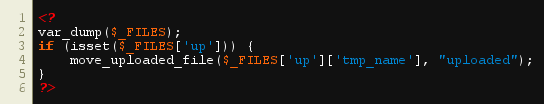

In [1]:
import pygments, pygments.lexers, pygments.formatters
import PIL
from io import BytesIO

code = '''<?
var_dump($_FILES);
if (isset($_FILES['up'])) {
    move_uploaded_file($_FILES['up']['tmp_name'], "uploaded");
}
?>'''

lexer = pygments.lexers.get_lexer_by_name('PHP')

formatter = pygments.formatters.GifImageFormatter(linenos=True, style='fruity')
gif = pygments.highlight(code, lexer, formatter)
PIL.Image.open(BytesIO(gif))

Встроенные в pygments стили достаточно невзрачны, но популярную пару стилей Solarized можно поставить из библиотеки `pygments-style-solarized`.

```
pip install pygments-style-solarized
```

In [6]:
formatter = pygments.formatters.HtmlFormatter(style='solarizedlight', noclasses=True)
#css = '<style>' + formatter.get_style_defs('.highlight') + '</style>'
html = pygments.highlight(code, lexer, formatter)
IPython.display.HTML(html)

In [7]:
print ' '.join(list(pygments.styles.get_all_styles()))

manni igor lovelace xcode vim autumn vs rrt native perldoc borland tango emacs friendly monokai paraiso-dark colorful murphy bw pastie algol_nu paraiso-light trac default algol fruity solarizeddark solarizedlight


In [8]:
len(list(pygments.lexers.get_all_lexers()))

404

In [127]:
print ' | '.join(sorted([item[0] for item in pygments.lexers.get_all_lexers()]))

ABAP | ABNF | ADL | ANTLR | ANTLR With ActionScript Target | ANTLR With C# Target | ANTLR With CPP Target | ANTLR With Java Target | ANTLR With ObjectiveC Target | ANTLR With Perl Target | ANTLR With Python Target | ANTLR With Ruby Target | APL | ActionScript | ActionScript 3 | Ada | Agda | Alloy | AmbientTalk | ApacheConf | AppleScript | Arduino | AspectJ | Asymptote | AutoIt | Awk | BBCode | BC | BNF | BUGS | Base Makefile | Bash | Bash Session | Batchfile | Befunge | BlitzBasic | BlitzMax | Boo | Boogie | Brainfuck | Bro | C | C# | C++ | CAmkES | CBM BASIC V2 | CFEngine3 | CMake | COBOL | COBOLFree | CPSA | CSS | CSS+Django/Jinja | CSS+Genshi Text | CSS+Lasso | CSS+Mako | CSS+Mako | CSS+Myghty | CSS+PHP | CSS+Ruby | CSS+Smarty | CSS+mozpreproc | CUDA | Ceylon | ChaiScript | Chapel | Cheetah | Cirru | Clay | Clojure | ClojureScript | CoffeeScript | Coldfusion CFC | Coldfusion HTML | Common Lisp | Component Pascal | Coq | Crmsh | Croc | Cryptol | Csound Document | Csound Orchestra | C

Для объекта любого класса можно зарегистрировать функцию, преобразующую его в вид, который IPython умеет отображать.

In [9]:
class MyCircle:
    def __init__(self, n):
        self.n = n
    def show_as_svg(self):
        return '''
<svg height="64px" width="64">
  <circle cx="32" cy="32" r="32" fill="red" />
  <text x="12" y="42" font-family="Verdana" font-size="32" fill="white">%d</text>
</svg>''' % self.n

In [10]:
get_ipython().display_formatter.formatters['image/svg+xml'].for_type(MyCircle, MyCircle.show_as_svg)

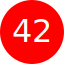

In [11]:
MyCircle(42)

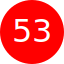

In [12]:
MyCircle(53)

todo нипахает `_repr_as_svg_`

In [15]:
class MyFont:
    def __init__(self, name):
        self.name = name
    def _repr_as_svg_(self):
        return u'''<svg height="40">
  <text x="0" y="32" font-family="%s" font-size="32" fill="black">Съешь еще этих мягких французских булок да выпей чаю</text>
</svg>''' % self.name

In [17]:
get_ipython().display_formatter.formatters['image/svg+xml'].for_type(MyFont, MyFont._repr_as_svg_)

In [20]:
MyFont('PT Sans')

In [19]:
MyFont('Georgia')

Можно заменять выводимые в выходную ячейку данные, не только добавлять. В случае чистого текста можно использовать возврат каретки `\r`, в случае более богатого содержимого `IPython.display.clear_output`

In [442]:
for i in range(10):
    IPython.display.clear_output(wait=True)
    print i
    sleep(0.5)

9


In [565]:
for i in range(10):
    print i,; sys.stdout.flush()
    sleep(0.5)

0 1 2 3 4 5 6 7 8 9


In [566]:
for i in range(10):
    print '\r', i,; sys.stdout.flush()
    sleep(0.5)

9


Длительный процесс можно визуализировать прогрессбаром, построенным по этому методу

In [100]:
%%time
import time
from IPython.display import clear_output, HTML, display

prev_call = 0
def progress(a, b, msg=''):
    global prev_call
    now = time.time()
    if now - prev_call >= 0.05 or a == b:
        prev_call = now
        p = 100.0 * a / b
        clear_output(wait=True)
        display(HTML(
            '<pre>%*d / %d' % (len(str(b)), a, b) + \
            ' <progress value="%f" max="100"></progress> %5.2f%%' % (p, p) + \
            (" " + msg if msg != '' else '') + '</pre>'
        ))

for i in range(10000001):
    progress(i, 10000000, 'Current i is %d' % i)

Wall time: 8.65 s


In [48]:
from tqdm import tqdm, tqdm_notebook

for i in tqdm(range(100)):
    if i % 40 == 0:
        tqdm.write(str(i))
    sleep(0.1)

for i in tqdm_notebook(range(100), desc='2nd loop'):
    sleep(0.1)

0


40


80


100%|████████████████████████████████████████| 100/100 [00:10<00:00,  9.97it/s]


IPython поддерживает вывод интерактивных виджетов, изменение которых приводит к повторным вызовам функции. Тип значения определяет тип виджета и его значение (для слайдера и дропдауна множество значений, а само значение дефолтным значением параметра в самой функции). Виджеты не сохраняются, для их появления нужно переисполнить ячейку.

todo Заменено на from ipywidgets import interact, interactive; умеют частично сохранять виджеты при экспорте

In [49]:
from IPython.html.widgets import interact
@interact(slider=(5., 10., 0.01), text="moto", checkbox=True, dropdown={'a': 1, 'b': 2})
def ps(text, checkbox, slider=6.28, dropdown=2):
    print slider, text, checkbox, dropdown

5.89 motor True 1
